# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [ ]:
# Loading the dataset

In [3]:
# creating database connection
conn = sqlite3.connect('inventory.db')

# fetching vendor summary data
df = pd.read_sql_query("select * from vendor_sale_summary",conn)
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,60320.00,1584606.40,9578.0,344712.22,64889.97,17598.14,68601.68,-1239894.18,-359.689651,0.158786,0.217538
1,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,96073.00,1553500.41,20226.0,444810.74,43304.31,37163.76,257032.07,-1108689.67,-249.249753,0.210527,0.286328
2,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,62385.00,1446708.15,9203.0,275162.97,52289.50,16909.12,144929.24,-1171545.18,-425.764114,0.147519,0.190199
3,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,75385.00,1375022.40,11189.0,288135.11,48202.30,20557.97,123780.22,-1086887.29,-377.214457,0.148425,0.209549
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,58783.00,1286759.87,11883.0,357759.17,52774.51,21833.58,257032.07,-929000.70,-259.672086,0.202150,0.278031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9072,8664,"""STOLI GROUP",15146,Achaval Ferrer Malbec,16-03-2024,750.0,12.92,1.00,102.0,2296.98,1385.38,11.33,18544.49,2295.98,99.956465,7.894737,2296.980000
9073,8664,"""STOLI GROUP",15470,Achaval Ferrer Quimera,16-07-2024,750.0,15.33,1.00,4.0,91.96,45.98,0.45,18544.49,90.96,98.912571,0.260926,91.960000
9074,8664,"""STOLI GROUP",22472,Achaval Ferrer Cab Svgn,05-07-2024,750.0,15.03,1.00,0.0,0.00,0.00,0.00,18544.49,-1.00,-inf,0.000000,0.000000
9075,3960,DIAGEO NORTH AMERICA INC,3775,Smirnoff Sorbet Pine/Coconut,0.73,50.0,1.00,0.73,0.0,0.00,0.00,0.00,257032.07,-0.73,-inf,0.000000,0.000000


# Explratory Data Analysis
- Previously, we examined the various tables in the database to identify key variables, understand their relationships and determine which ones should be included in the final analysis.

- In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies and ensure data quality before proceeding with further analysis.

In [4]:
# summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,9077.0,1.005116e+04,17185.871924,2.00,3960.000000,7245.000000,9552.000000,1.733570e+05
Brand,9077.0,1.682761e+04,13033.508045,58.00,4295.000000,16351.000000,24606.000000,9.063100e+04
Volume,9077.0,8.623253e+02,611.120430,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,9077.0,1.592340e+03,5325.930135,0.71,25.000000,203.000000,1101.000000,1.607350e+05
TotalPurchaseDollars,9077.0,1.465141e+04,54942.105220,0.71,251.520000,2197.840000,11309.760000,1.584606e+06
TotalSalesQuantity,9077.0,3.108496e+02,963.294551,0.00,3.000000,41.000000,247.000000,2.854400e+04
TotalSalesDollars,9077.0,4.485465e+03,14327.902839,0.00,75.240000,786.470000,3671.930000,4.448107e+05
TotalSalesPrice,9077.0,2.237647e+03,4859.226749,0.00,29.700000,449.750000,2173.840000,6.488997e+04
TotalExciseTax,9077.0,2.024768e+02,1000.606465,0.00,0.450000,7.460000,63.920000,3.716376e+04
FreightCost,9077.0,6.104988e+04,61420.471168,0.27,15884.820000,48347.260000,79528.990000,2.570321e+05


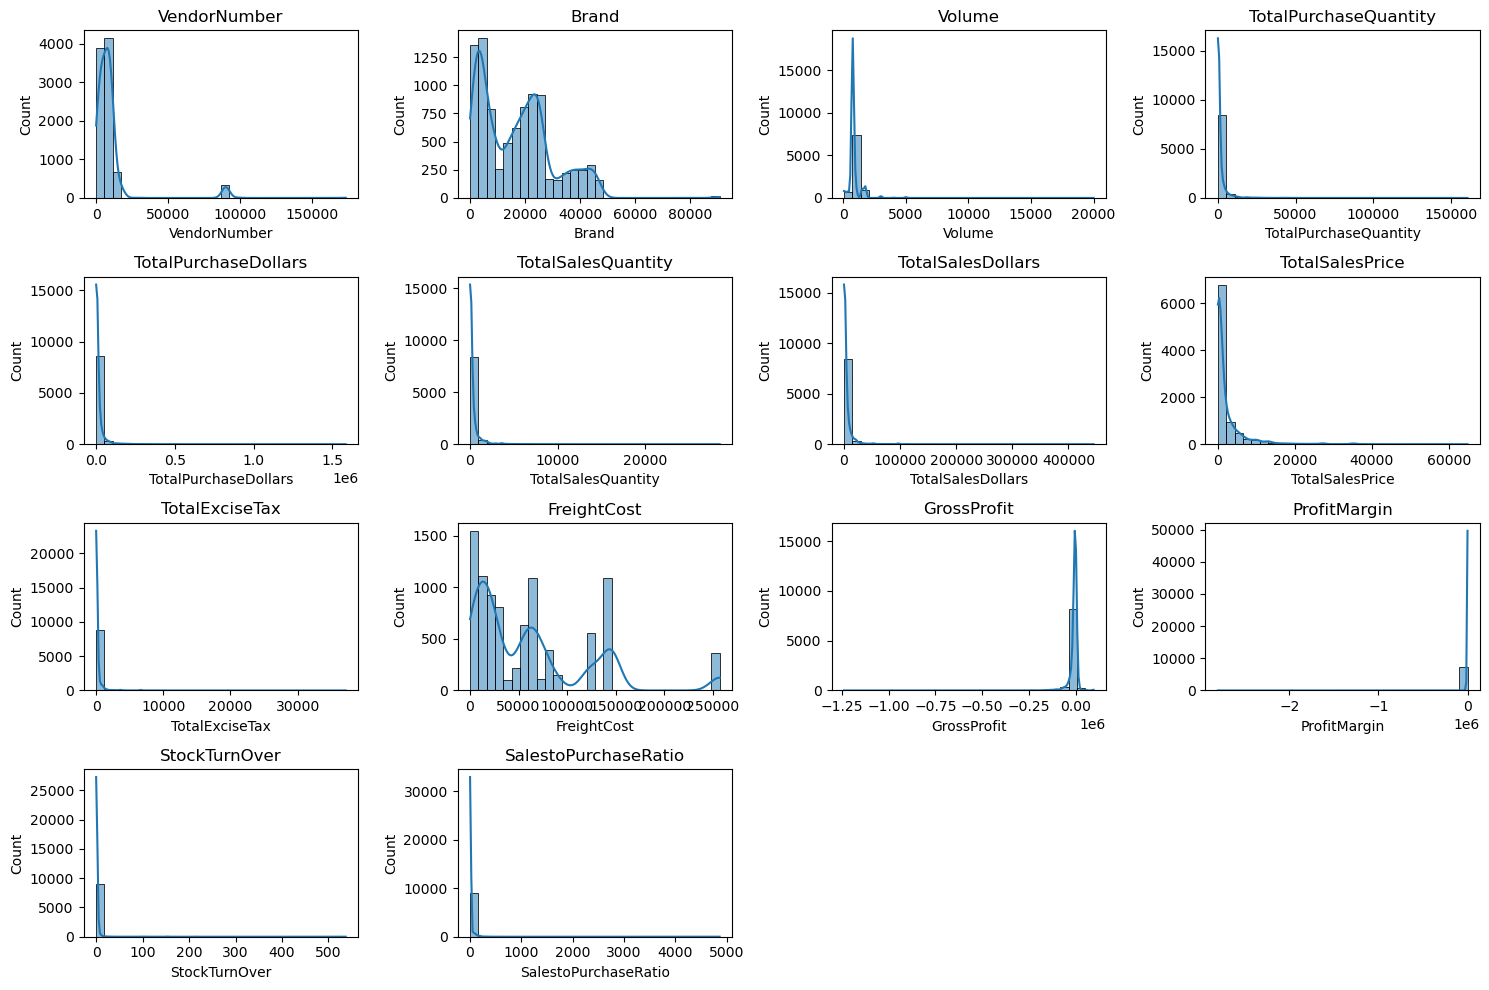

In [5]:
# Distribution plots for numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) # Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

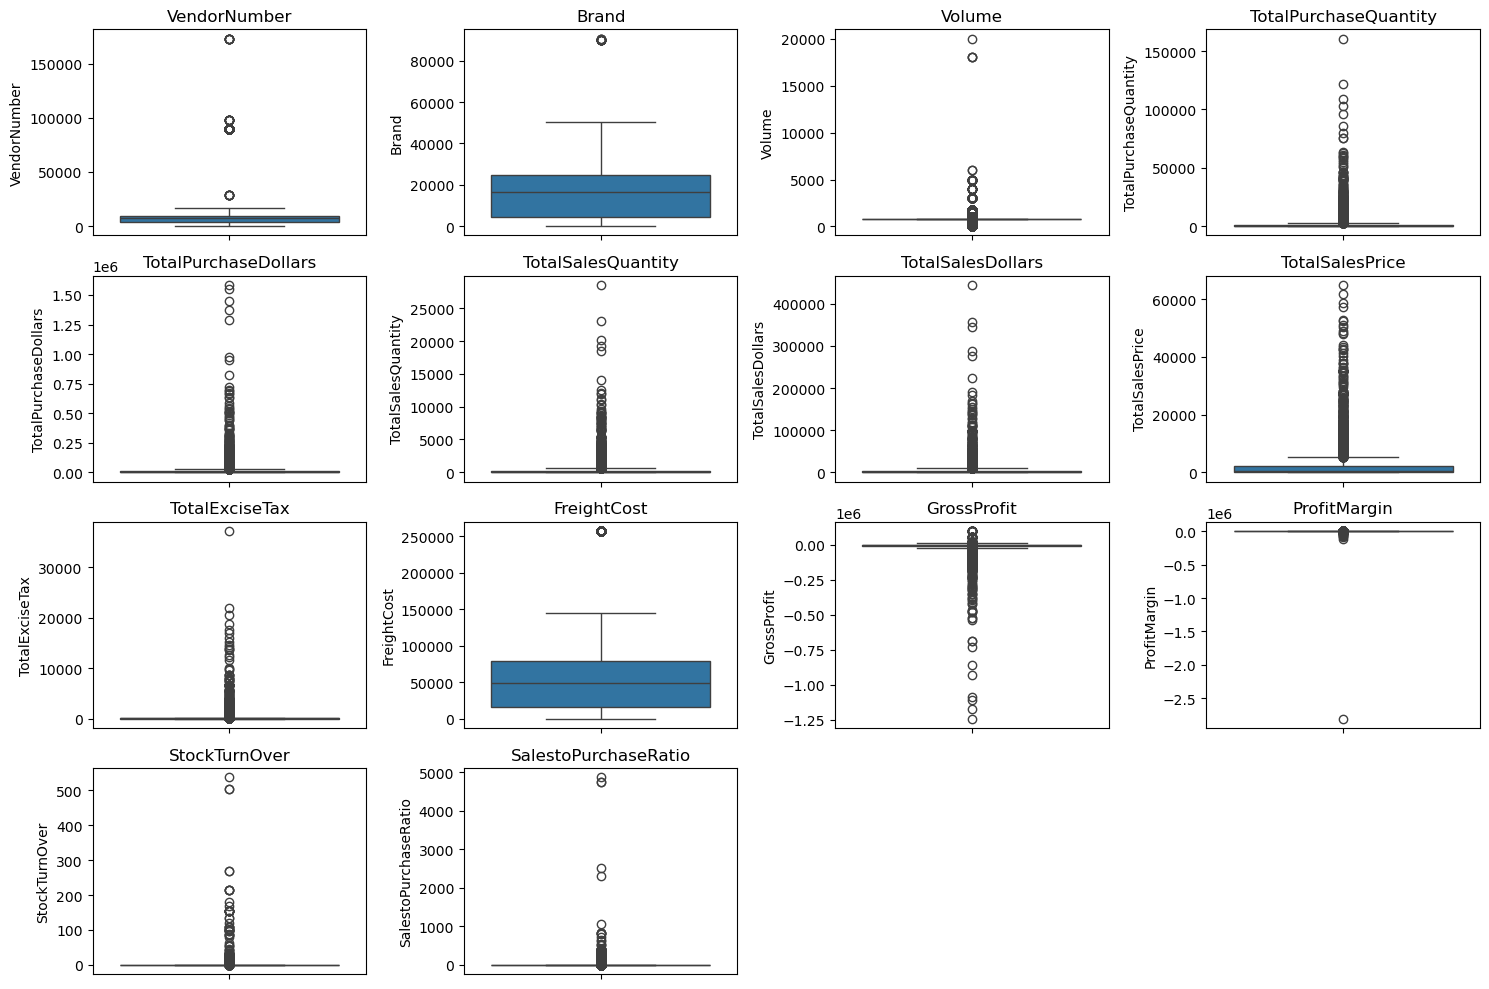

In [6]:
# This code will be apply if profitmargin row has any value not only NaN of -inf
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


# # Filter out truly numeric and non-empty columns
# import math
# valid_cols = []
# for col in numerical_cols:
#     # Check: column must be numeric, have non-NaN, finite values
#     if pd.api.types.is_numeric_dtype(df[col]):
#         cleaned = df[col].dropna()
#         cleaned = cleaned[np.isfinite(cleaned)]  # Remove inf/-inf
#         if not cleaned.empty:
#             valid_cols.append(col)

# # Outlier Detection with Boxplots
# # Set up the plot
# plt.figure(figsize=(15, 10))
# n_cols = 4
# n_rows = math.ceil(len(valid_cols) / n_cols)

# for i, col in enumerate(valid_cols):
#     plt.subplot(n_rows, n_cols, i + 1)
#     sns.boxplot(y=df[col])
#     plt.title(col)

# plt.tight_layout()
# plt.show()

# Summary Statistics Insights:
Negative & Zero Values:
- Gross Profit: Minimum value is -52,002.78, indicating significant losses. Some products or transactions may be selling at a loss due to high costs or selling discountes lower than the purchase price.

- Profit Margin: Has a minimum of -∞, which suggests cases where revenue is zero or even lower than costs.

- Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

Outliers Indicated by High Standard Deviations:
- Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.

- Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.

- Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that sold quantity for that product is higher than purchased quantity due to either sales being fulfilled from older stock.

In [7]:
# let's filter the data by removing inconsistencies
# This code will be run after below mention columns has any positive values because its ignore nagative values


df = pd.read_sql_query("""SELECT * FROM vendor_sale_summary
WHERE GrossProfit > 0
AND ProfitMargin > 0
AND TotalSalesQuantity > 0""",conn)

In [8]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalestoPurchaseRatio
0,1392,CONSTELLATION BRANDS INC,6650,Simi Chard,7.38,750.0,11199.00,82648.62,8458.0,93369.42,13558.87,949.79,79528.99,10720.80,11.482132,0.755246,1.129715
1,1392,CONSTELLATION BRANDS INC,22143,Simi Cab Svgn,10.52,750.0,4194.00,44120.88,2887.0,46523.13,13703.56,323.21,79528.99,2402.25,5.163561,0.688364,1.054447
2,516,BANFI PRODUCTS CORP,18152,Banfi Centine Mntcln Tscna,5.26,750.0,5723.00,30102.98,3891.0,31728.09,7605.68,436.17,8510.41,1625.11,5.121991,0.679888,1.053985
3,10754,PERFECTA WINES,25197,Ch La Rousseliere St Estephe,99.33,750.0,249.00,24733.17,198.0,29698.02,1199.92,22.24,28720.52,4964.85,16.717781,0.795181,1.200737
4,4425,MARTIGNETTI COMPANIES,8781,Rodney Strong Cab Svgn,10.32,750.0,2241.00,23127.12,1840.0,31245.60,11934.97,205.53,144929.24,8118.48,25.982794,0.821062,1.351037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,8664,"""STOLI GROUP",8500,Stolichnaya Chocolat Kokonut,12-02-2024,750.0,6.28,1.00,534.0,4753.86,2841.21,420.64,18544.49,4752.86,99.978964,85.031847,4753.860000
1554,8664,"""STOLI GROUP",8500,Stolichnaya Chocolat Kokonut,21-03-2024,750.0,6.28,1.00,534.0,4753.86,2841.21,420.64,18544.49,4752.86,99.978964,85.031847,4753.860000
1555,8664,"""STOLI GROUP",15146,Achaval Ferrer Malbec,16-03-2024,750.0,12.92,1.00,102.0,2296.98,1385.38,11.33,18544.49,2295.98,99.956465,7.894737,2296.980000
1556,8664,"""STOLI GROUP",15470,Achaval Ferrer Quimera,16-07-2024,750.0,15.33,1.00,4.0,91.96,45.98,0.45,18544.49,90.96,98.912571,0.260926,91.960000


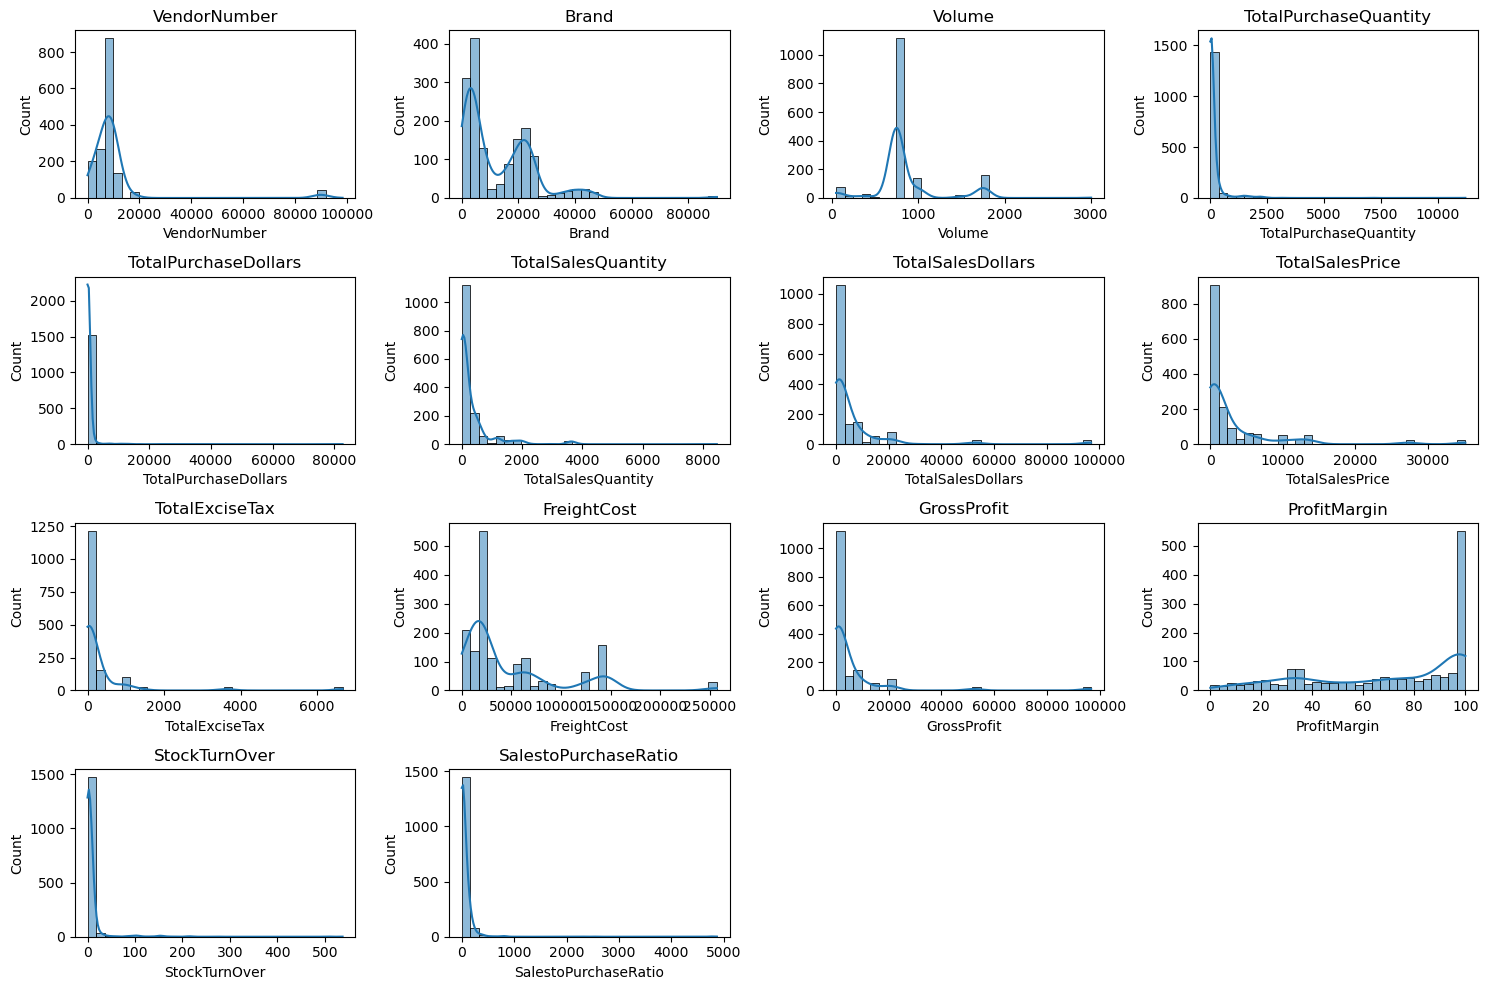

In [10]:
# Distribution plots for numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) # Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

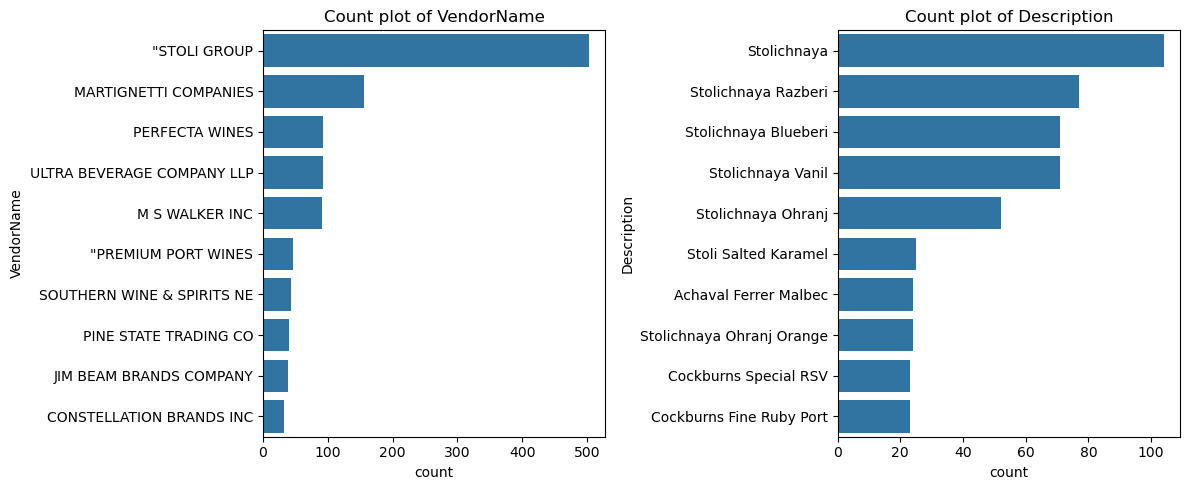

In [11]:
# Count plots for categorical columns 
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])  # Top 10 categories
    plt.title(f"Count plot of {col}")
plt.tight_layout()
plt.show()

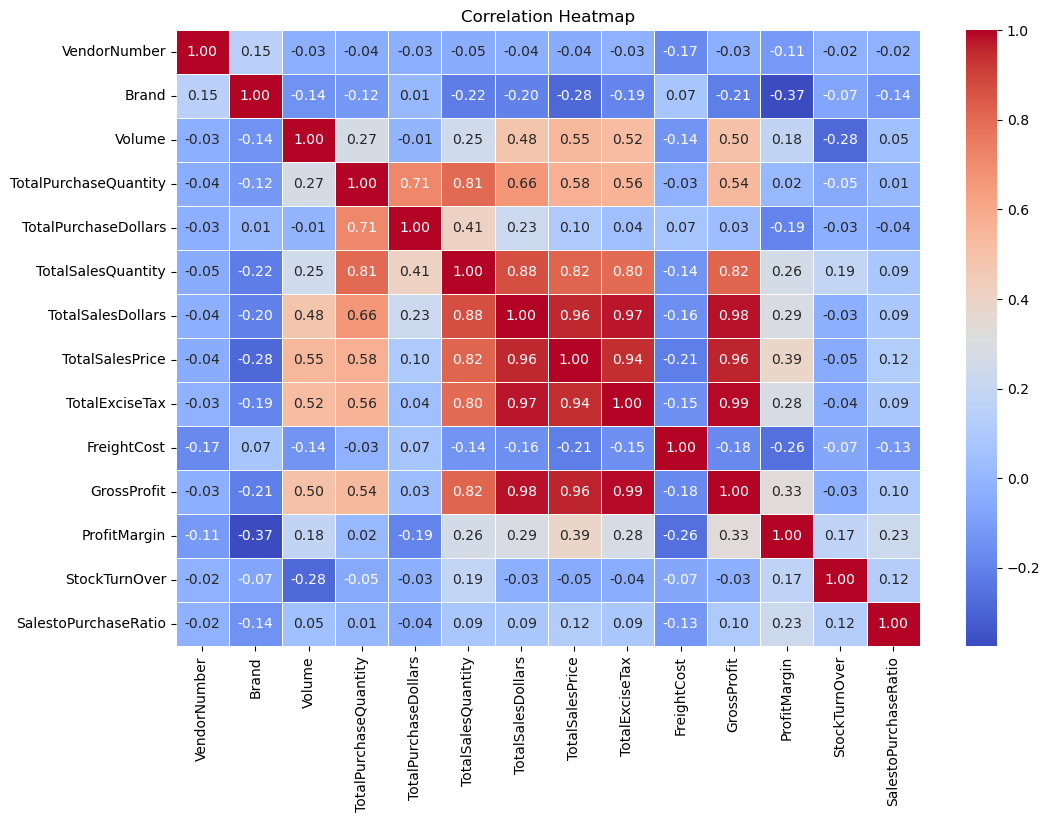

In [12]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Correlation Insights

* PurchasePrice has weak correlation with TotalSalesDollars (-0.012) and GrossProfit (-0.016), suggesting that price variations do not significantly imapct sales revenueor or profit.
* Strong correlation between total purchase quantity and total sales quantity (0.999), confirming effecient inventory turnover.
* Negative correlation between profit margin & total price (-0.179) suggests that as sales price increases, margins decreases, possibly due to competitive pricing pressures.
* StockTurnOver has weak negative correlation with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.

# Data Analysis
Identify Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins.

In [13]:
brand_performance=df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'
}).reset_index()

In [14]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_sales = brand_performance['ProfitMargin'].quantile(0.85)

In [15]:
low_sales_threshold

119.88

In [16]:
high_margin_sales

87.5365576097942

In [17]:
# Filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_sales)
]
print("Brands with low sales but high Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales but high Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
942,Tracia Syrah,44.94,88.495772
68,Bacardi Oakheart Spiced Trav,59.94,87.554221
277,Chicken & Turkey Cotes du Rh,59.94,90.990991
358,Dr McGillicuddy's Apple Pie,62.72,96.269133
853,St Elder Elderflower Liqueur,66.33,91.436756
50,Aresti Pnt Nr Curico Vly,74.85,95.617902
333,DeKuyper Buttershots Trav,76.93,90.718835
927,Three Olives Grape Vodka,80.19,99.114603
854,St Germain Liqueur,89.94,87.658439
713,Piehole Apple Pie,98.01,95.592287


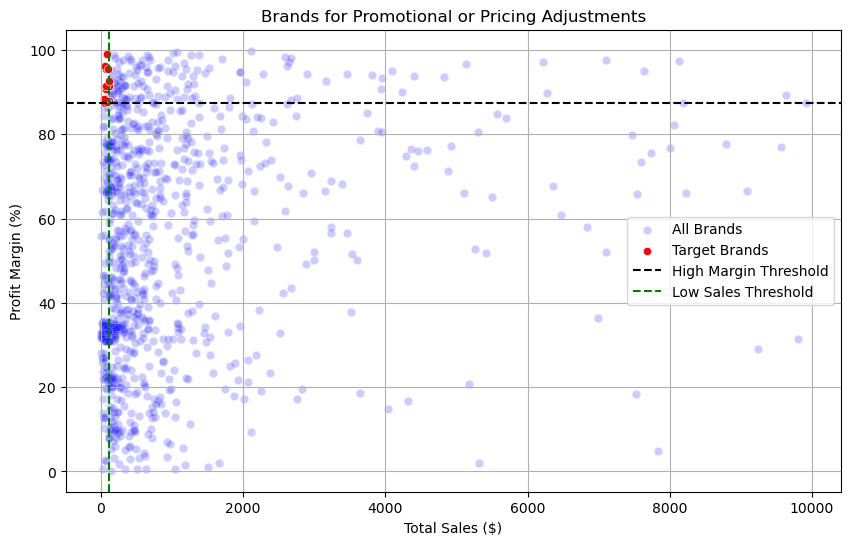

In [18]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars'] < 10000]  # for better visualization

plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha=0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(high_margin_sales, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='green', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Function to format dollar values
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [20]:
# Top vendors & brands by sales performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)

In [21]:
top_vendors

VendorName
"STOLI GROUP                  7815864.93
MARTIGNETTI COMPANIES          248748.59
CONSTELLATION BRANDS INC       189863.67
"PREMIUM PORT WINES            178914.24
ULTRA BEVERAGE COMPANY LLP     148726.20
M S WALKER INC                 117693.77
PERFECTA WINES                 114277.24
BACARDI USA INC                 61602.49
DIAGEO NORTH AMERICA INC        55169.14
BROWN-FORMAN CORP               46884.09
Name: TotalSalesDollars, dtype: float64

In [22]:
top_brands

Description
Stolichnaya                  3381587.30
Stolichnaya Razberi          2113015.12
Stolichnaya Ohranj            710929.96
Stolichnaya Vanil             636250.70
Stolichnaya Blueberi          601639.46
Stoli Salted Karamel          115760.75
Cockburns Fine Ruby Port      112587.30
Simi Chard                     93369.42
Cockburns Special RSV          66326.94
Stolichnaya Ohranj Orange      60407.52
Name: TotalSalesDollars, dtype: float64

In [23]:
top_brands.apply(lambda x: format_dollars(x))

Description
Stolichnaya                    3.38M
Stolichnaya Razberi            2.11M
Stolichnaya Ohranj           710.93K
Stolichnaya Vanil            636.25K
Stolichnaya Blueberi         601.64K
Stoli Salted Karamel         115.76K
Cockburns Fine Ruby Port     112.59K
Simi Chard                    93.37K
Cockburns Special RSV         66.33K
Stolichnaya Ohranj Orange     60.41K
Name: TotalSalesDollars, dtype: object

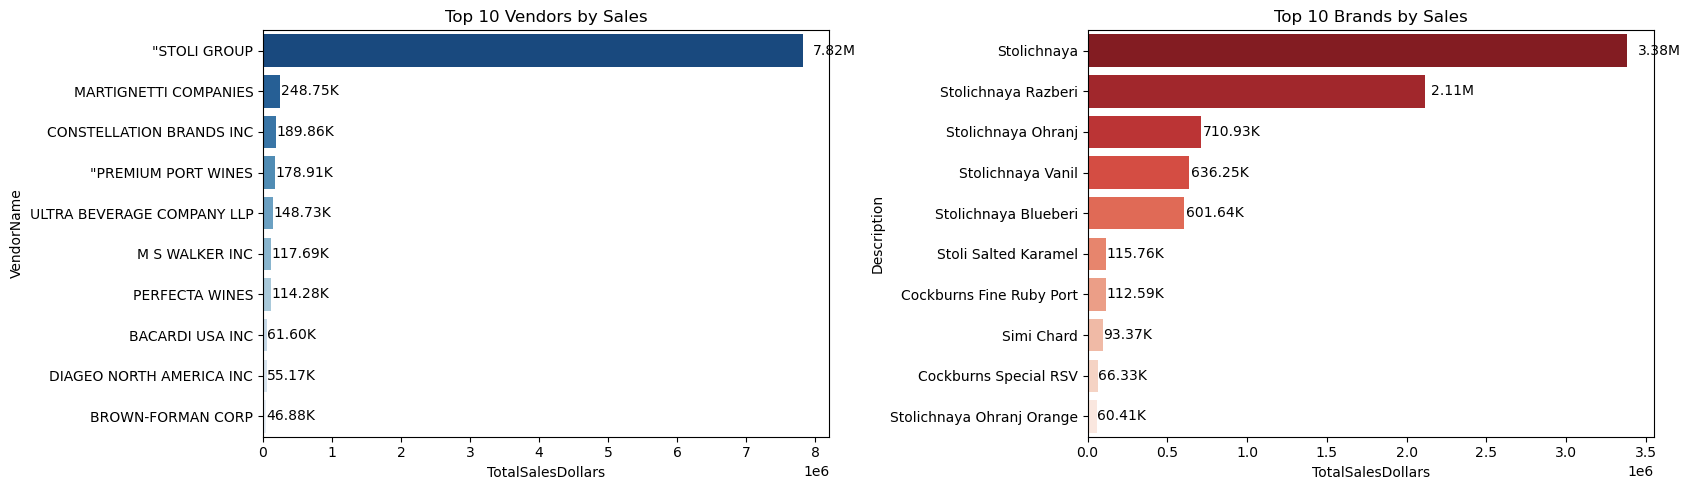

In [24]:
# Convert to DataFrames
top_vendors_df = top_vendors.reset_index()
top_brands_df = top_brands.reset_index()

plt.figure(figsize=(17, 5))

# --- Plot Top Vendors ---
plt.subplot(1, 2, 1)
ax1 = sns.barplot(data=top_vendors_df, x='TotalSalesDollars', y='VendorName', palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(
        bar.get_width() + bar.get_width() * 0.02,
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left', va='center', fontsize=10, color='black'
    )

# --- Plot Top Brands ---
plt.subplot(1, 2, 2)
ax2 = sns.barplot(data=top_brands_df, x='TotalSalesDollars', y='Description', palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(
        bar.get_width() + bar.get_width() * 0.02,
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left', va='center', fontsize=10, color='black'
    )

plt.tight_layout()
plt.show()

In [25]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars': 'sum',
    'GrossProfit': 'sum',
    'TotalSalesDollars': 'sum'
}).reset_index()

In [26]:
vendor_performance['PurchaseContribution%'] = (vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100).round(0)

In [27]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending=False),2).reset_index()

In [28]:
# Display Top 10 Vendors
top_vendors = vendor_performance.head(10)

top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)

top_vendors

,index,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
0,13,CONSTELLATION BRANDS INC,157.38K,32.49K,189.86K,19.0
1,36,MARTIGNETTI COMPANIES,108.15K,140.60K,248.75K,13.0
2,3,"""STOLI GROUP",88.74K,7.73M,7.82M,11.0
3,45,PERFECTA WINES,65.88K,48.39K,114.28K,8.0
4,65,ULTRA BEVERAGE COMPANY LLP,56.97K,91.76K,148.73K,7.0
5,34,M S WALKER INC,46.58K,71.11K,117.69K,6.0
6,6,BACARDI USA INC,30.94K,30.66K,61.60K,4.0
7,7,BANFI PRODUCTS CORP,33.93K,3.67K,37.59K,4.0
8,18,DIAGEO NORTH AMERICA INC,24.82K,30.35K,55.17K,3.0
9,29,JIM BEAM BRANDS COMPANY,20.03K,24.15K,44.18K,2.0


In [29]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()

In [30]:
top_vendors

,index,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution%
0,13,CONSTELLATION BRANDS INC,157.38K,32.49K,189.86K,19.0,19.0
1,36,MARTIGNETTI COMPANIES,108.15K,140.60K,248.75K,13.0,32.0
2,3,"""STOLI GROUP",88.74K,7.73M,7.82M,11.0,43.0
3,45,PERFECTA WINES,65.88K,48.39K,114.28K,8.0,51.0
4,65,ULTRA BEVERAGE COMPANY LLP,56.97K,91.76K,148.73K,7.0,58.0
5,34,M S WALKER INC,46.58K,71.11K,117.69K,6.0,64.0
6,6,BACARDI USA INC,30.94K,30.66K,61.60K,4.0,68.0
7,7,BANFI PRODUCTS CORP,33.93K,3.67K,37.59K,4.0,72.0
8,18,DIAGEO NORTH AMERICA INC,24.82K,30.35K,55.17K,3.0,75.0
9,29,JIM BEAM BRANDS COMPANY,20.03K,24.15K,44.18K,2.0,77.0


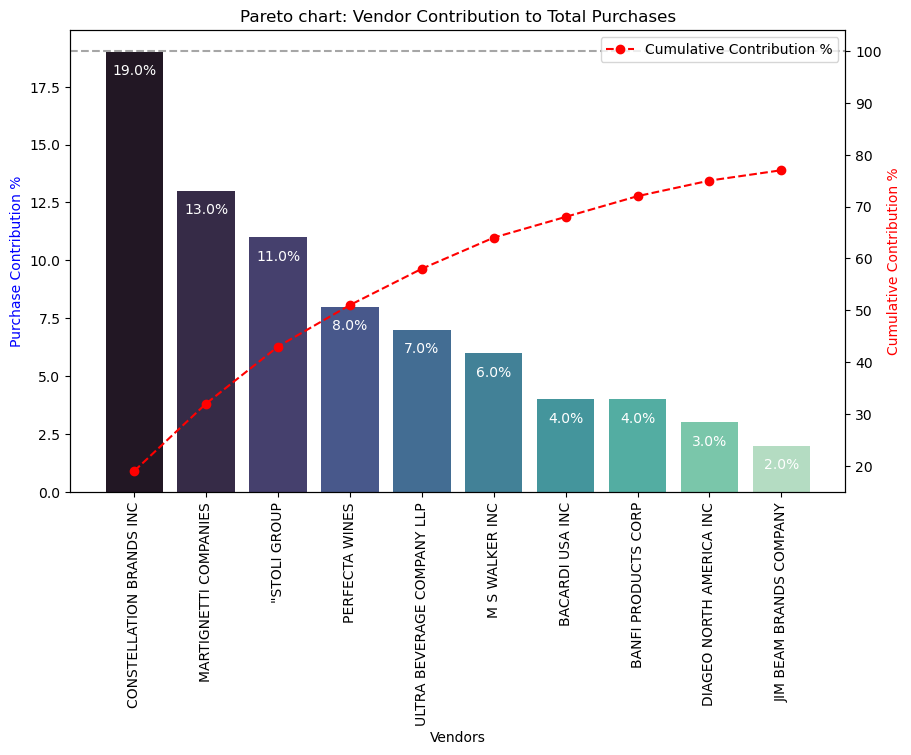

In [31]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], 
            palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, str(value) + '%', ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], 
         color='red', marker='o', linestyle='dashed', label='Cumulative Contribution %')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

In [32]:
# Calculate total purchase contribution of top 10 vendors
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)} %")

Total Purchase Contribution of top 10 vendors is 77.0 %


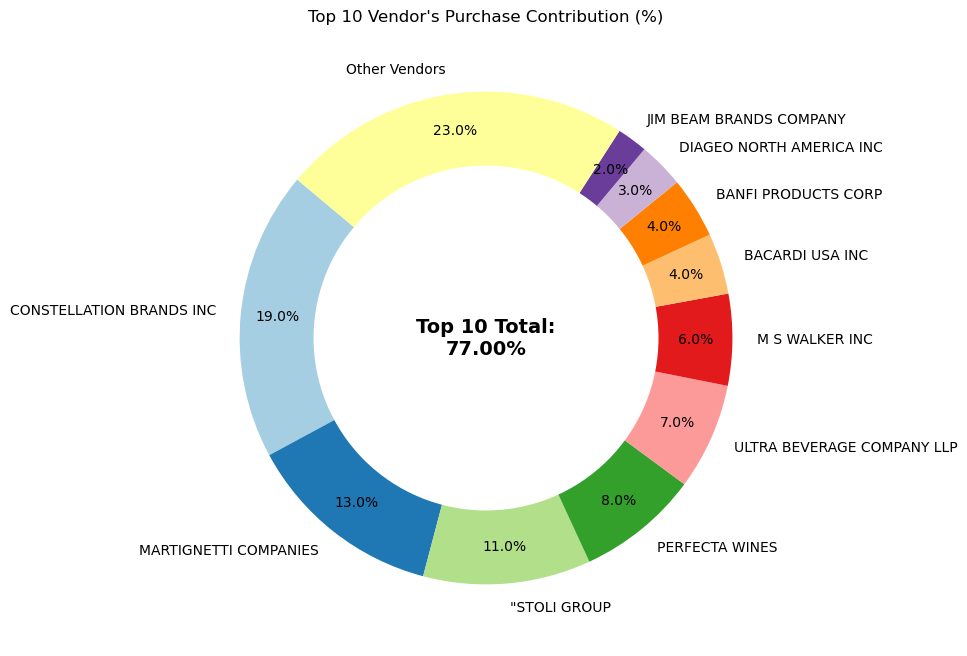

In [33]:
# Extract vendor names and purchase contributions
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                                 startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

In [34]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [35]:
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalestoPurchaseRatio,UnitPurchasePrice
0,1392,CONSTELLATION BRANDS INC,6650,Simi Chard,7.38,750.0,11199.0,82648.62,8458.0,93369.42,13558.87,949.79,79528.99,10720.80,11.482132,0.755246,1.129715,7.38
1,1392,CONSTELLATION BRANDS INC,22143,Simi Cab Svgn,10.52,750.0,4194.0,44120.88,2887.0,46523.13,13703.56,323.21,79528.99,2402.25,5.163561,0.688364,1.054447,10.52
2,516,BANFI PRODUCTS CORP,18152,Banfi Centine Mntcln Tscna,5.26,750.0,5723.0,30102.98,3891.0,31728.09,7605.68,436.17,8510.41,1625.11,5.121991,0.679888,1.053985,5.26
3,10754,PERFECTA WINES,25197,Ch La Rousseliere St Estephe,99.33,750.0,249.0,24733.17,198.0,29698.02,1199.92,22.24,28720.52,4964.85,16.717781,0.795181,1.200737,99.33
4,4425,MARTIGNETTI COMPANIES,8781,Rodney Strong Cab Svgn,10.32,750.0,2241.0,23127.12,1840.0,31245.60,11934.97,205.53,144929.24,8118.48,25.982794,0.821062,1.351037,10.32


In [36]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'],q=3,labels = ['small','medium','large'])

In [37]:
df[['OrderSize','TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,large,11199.00
1,large,4194.00
2,large,5723.00
3,large,249.00
4,large,2241.00
...,...,...
1553,small,6.28
1554,small,6.28
1555,medium,12.92
1556,medium,15.33


In [38]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
small,29.702887
medium,10.778135
large,3.622721


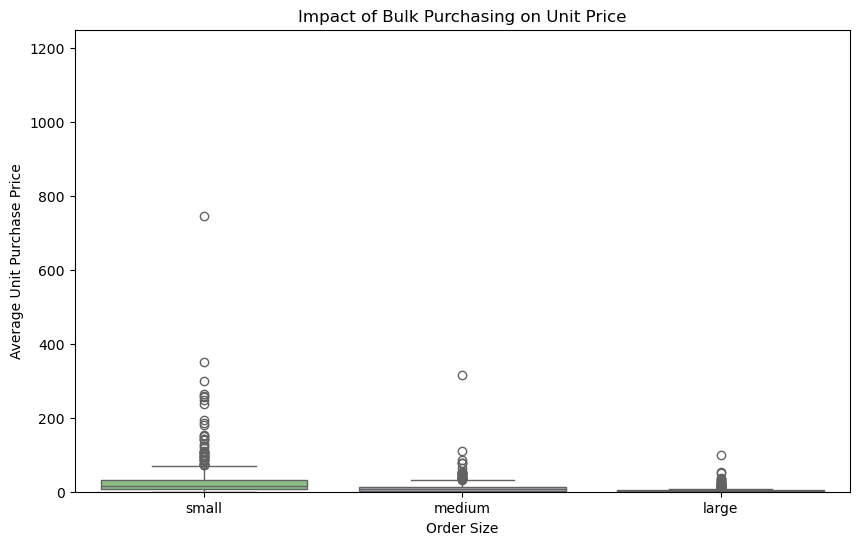

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Accent")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.ylim(0, 1250)
plt.show()

• Vendors buying in bulk (Large OrderSize) get the lowest unit price ($9.16 per unit), meaning higher margins if they can manage inventory efficiently.

• The price difference between Small and Large orders is substantial (~72% reduction in unit cost)

• This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

# Which vendors have low inventory turnover, indicating excess stock and slow-moving products?

In [40]:
df[df['StockTurnOver'] < 1].groupby('VendorName')[['StockTurnOver']].mean().sort_values('StockTurnOver', ascending = True).head(10)

,StockTurnOver
VendorName,
"""IRA GOLDMAN AND WILLIAMS",0.083822
"""HOOD RIVER DISTILLERS",0.425481
"""STOLI GROUP",0.546186
PALM BAY INTERNATIONAL INC,0.666667
WILLIAM GRANT & SONS INC,0.695652
WINE GROUP INC,0.704774
TREASURY WINE ESTATES,0.705882
CONSTELLATION BRANDS INC,0.726606
BANFI PRODUCTS CORP,0.727246


# How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [52]:
# Calculate unsold inventory value
df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) #* df["PurchasePrice"]
print('Total Unsold Capital:', format_dollars(df["UnsoldInventoryValue"].sum()))

Total Unsold Capital: -262091.64


In [53]:
# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor["UnsoldInventoryValue"] = inventory_value_per_vendor["UnsoldInventoryValue"].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
13,CONSTELLATION BRANDS INC,3.29K
7,BANFI PRODUCTS CORP,1.88K
27,FREDERICK WILDMAN & SONS,1.07K
64,TRINCHERO FAMILY ESTATES,657.0
73,WINE GROUP INC,377.0
0,"""HOOD RIVER DISTILLERS",309.0799999999999
42,NICHE W & S,132.0
56,SIDNEY FRANK IMPORTING CO,83.0
63,TREASURY WINE ESTATES,44.0
1,"""IRA GOLDMAN AND WILLIAMS",43.72


# What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors.

In [43]:
# Define thresholds for top and low performing vendors
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

# Filter vendors based on performance
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

In [44]:
top_vendors

0       11.482132
1        5.163561
2        5.121991
3       16.717781
4       25.982794
          ...    
1297    99.607398
1436    99.863327
1456    99.847496
1461    99.838229
1484    99.872913
Name: ProfitMargin, Length: 399, dtype: float64

In [45]:
low_vendors

469      8.499727
474      1.743841
479      9.303101
500     16.988417
524     20.022235
          ...    
1546    98.888518
1547    98.888518
1548    99.650191
1556    98.912571
1557    99.114603
Name: ProfitMargin, Length: 390, dtype: float64

In [46]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (89.33, 93.47), Mean: 91.40
Low Vendors 95% CI: (46.73, 52.05), Mean: 49.39


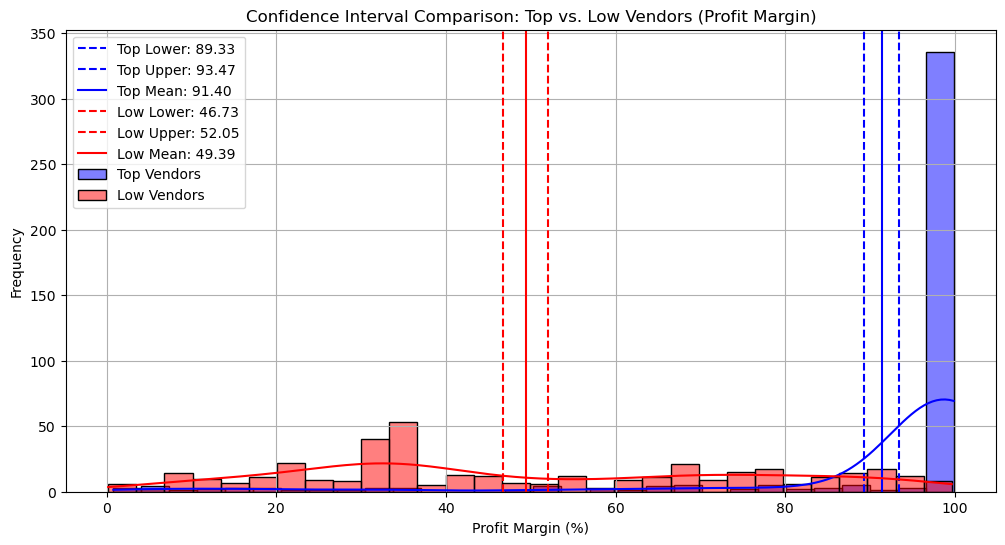

In [47]:
# Calculate confidence intervals for top and low vendors
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

# Print confidence interval results
print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

# Create figure with subplots
plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

# Key Findings:

- Low-performing vendors have higher profit margins (43.33% to 46.04%)
- Top-performing vendors have lower profit margins (16.13% to 17.47%)
- This is the opposite of what you might expect!

- Low-performing vendors likely use premium pricing strategies or have lower operational costs
High-performing vendors might sacrifice margin for volume (competitive pricing to drive sales)

# Strategic Implications:
# For High-Performing Vendors:

*They're already successful with lower margins (high volume strategy)
Could potentially increase profitability through:*

- Selective price adjustments on popular items
- Cost optimization to improve margins without raising prices
- Product bundling to increase average transaction value


# For Low-Performing Vendors:

*High margins but low sales suggest pricing or marketing issues
Need to focus on:*

- Better marketing to increase visibility
- Competitive pricing to attract more customers
- Improved distribution to reach more buyers

# Hypothesis Testing:

**Research Question:**
Is there a significant difference in profit margins between top-performing and low-performing vendors?
The Two Hypotheses:
- H₀ (Null Hypothesis):

"There is no significant difference in the mean profit margins of top-performing and low-performing vendors".
This assumes any observed difference is just due to random chance.
We start by assuming this is true until proven otherwise.

- H₁ (Alternative Hypothesis):

"The mean profit margins of top-performing and low-performing vendors are significantly different".
This is what we're trying to prove.
It suggests there's a real, meaningful difference.

In [48]:
# Define thresholds for top and low performing vendors
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

# Filter vendors based on performance
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# perform 2-sample t-test:

t_stat, p_value = ttest_ind(top_vendors,low_vendors,equal_var=False)

#Print results

print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H₀: No significant difference in profit margins.")

T-Statistic: 24.4997, P-Value: 0.0000
Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.
